# Wines Points prediction 

In [64]:
%load_ext autoreload
%autoreload 2
import sys; sys.path.append('../')

Here we will try to predict the points a wine will get based on known characteristics (i.e. features, in the ML terminology). The mine point in this stage is to establish a simple, ideally super cost effective, basline.
In the real world there is a tradeoff between complexity and perforamnce, and the DS job, among others, is to present a tradeoff tables of what performance is achivalbel at what complexity level. 

to which models with increased complexity and resource demands will be compared. Complexity should then be translated into cost. For example:
 * Compute cost 
 * Maintenance cost
 * Serving costs (i.e. is new platform needed?) 
 

## Loading the data

In [65]:
import pandas as pd
import cufflinks as cf; cf.go_offline()

In [3]:
wine_reviews = pd.read_csv("data/winemag-data-130k-v2.csv")
wine_reviews.shape

(129971, 14)

In [4]:
wine_reviews.sample(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
6562,6562,Chile,"Wiry, scratchy blueberry and black-currant aro...",Marques de Casa Concha,85,25.0,Maule Valley,NaN,NaN,Michael Schachner,@wineschach,Concha y Toro 2013 Marques de Casa Concha Merl...,Merlot,Concha y Toro
98676,98676,US,This unusual wine has a backbone of acidity ak...,NaN,82,27.0,California,Sonoma Valley,Sonoma,NaN,NaN,Envolve 2012 Sauvignon Blanc (Sonoma Valley),Sauvignon Blanc,Envolve
88892,88892,US,"Fresh and appealing, this unusual blend of 80%...",Portfolio Collection Due Rossi Barbera-Sangiovese,85,25.0,Pennsylvania,Pennsylvania,NaN,NaN,NaN,Chaddsford 2007 Portfolio Collection Due Rossi...,Red Blend,Chaddsford
9052,9052,Germany,While intensely aromatic of honey and marmalad...,Graacher Dompropst GG,91,72.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,S.A. Prüm 2011 Graacher Dompropst GG Riesling ...,Riesling,S.A. Prüm
12529,12529,US,The winery remains committed to French Colomba...,The Count's Selection,88,32.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Buena Vista 2013 The Count's Selection Colomba...,Colombard,Buena Vista


## Data exploration and transformation

### drop_duplicates

In [5]:
wine_reviews = wine_reviews.drop(columns=['Unnamed: 0'])

In [6]:
wine_reviews = wine_reviews.drop_duplicates()
wine_reviews.shape

(119988, 13)

### describe wine point

In [7]:
statistic_info = wine_reviews.points.describe(percentiles=[0.25,0.75])
statistic_info

count    119988.000000
mean         88.442236
std           3.092915
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

In [8]:
mu = statistic_info[1]
std = statistic_info[2]

<AxesSubplot:>

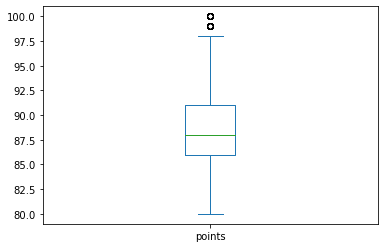

In [9]:
wine_reviews.points.plot(kind = 'box')

In [66]:
import numpy as np 
import pylab 
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt

In [11]:
wine_reviews['normalized points'] = wine_reviews.points.apply(lambda point: (point-mu)/std)

<AxesSubplot:>

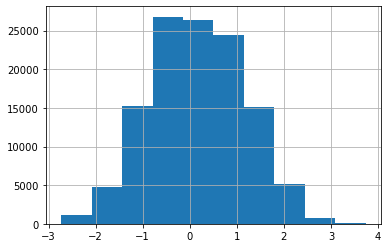

In [12]:
wine_reviews['normalized points'].hist()

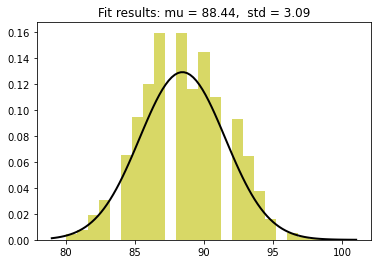

In [13]:
# Plot the histogram.
plt.hist(wine_reviews['points'], bins=25, density=True, alpha=0.6, color='y')

#Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

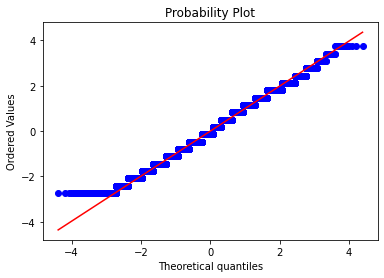

In [14]:
stats.probplot(wine_reviews['normalized points'], dist="norm", plot=pylab)
pylab.show()

### repeated infromation in row

In the last lesson, thanks to Anat, we noticed that the title column is actually made up of four information data in existing columns: veraity, winery, region2 and region 1. The other significant figure from this position is the year of production - so we opened a new column that applies only the year of production

In [15]:
wine_reviews['title'].sample(5)

16658     Wines & Winemakers 2012 Pegos Claros Vinhas Ve...
61775     V. Sattui 2009 Mounts Vineyard Zinfandel (Dry ...
80528        Le Macchiole 2014 Paleo Bianco White (Toscana)
109056    Conn Creek 2008 Collins Holystone Vineyard Cab...
72567            Bella Grace 2013 Primitivo (Amador County)
Name: title, dtype: object

after looking at the data we can see there is a possibility of additional numbers other than the year, such as the year of establishment of the company, and it makes sense that the company has no wine before it was established, so we will always prefer the largest number until 2022, also, There is no wine before the year 2000

In [16]:
years = []
for title in wine_reviews['title']:
    year_production = [int(year) for year in title.split() if (year.isdigit() and int(year) < 2022 and int(year) > 1999) ]
    years.append(year_production)
years = pd.DataFrame(years)
years.sample(5)


,0,1
114808,2010.0,NaN
81872,2008.0,NaN
21716,2005.0,NaN
48830,2012.0,NaN
59129,2014.0,NaN


In [17]:
years.shape

(119988, 2)

In [18]:
years.max(axis = 1)[years[0] > 0].shape

(113989,)

In [19]:
years.max(axis = 1)[years[0].isnull()].shape

(5999,)

There is very small date without year  -  we will drop it

In [20]:
wine_reviews['years'] = years.max(axis = 1)
wine_reviews =  wine_reviews[wine_reviews['years'] > 0]
wine_reviews.to_csv("data/wine_reviews_wine.csv")
wine_reviews.shape

(105822, 15)

<AxesSubplot:>

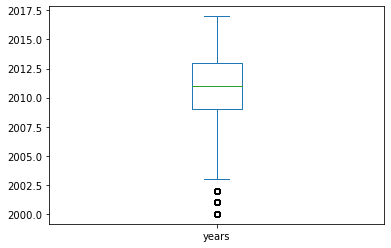

In [21]:
wine_reviews.years.plot(kind = 'box')

In [22]:
points_per_year = wine_reviews.groupby('years').points.mean().sort_values().reset_index()
points_per_year.head()

,years,points
0,2017.0,87.400000
1,2000.0,88.034743
2,2002.0,88.167164
3,2001.0,88.319739
4,2004.0,88.338424


<AxesSubplot:>

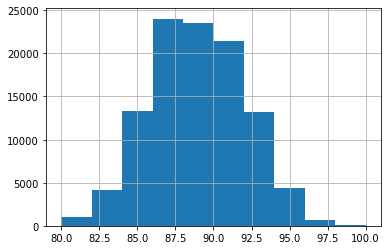

In [23]:
wine_reviews['points'].hist()

## Points prediction

Points is descrete value target. There for we are talking about a prediction (Regression) problem (in contrary to classification problem). Prediction solutions can be measured in few metrics:

* MSE - [Mean score error](https://en.wikipedia.org/wiki/Mean_squared_error)
* R2 - [R Square](https://en.wikipedia.org/wiki/Coefficient_of_determination)
* MAE - [Mean absolut error](https://en.wikipedia.org/wiki/Mean_absolute_error)

Read more [here](https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b)

### Train and test set split

To properly report results, let's split to train and test datasets:

In [24]:
train_data = wine_reviews.sample(frac = 0.8, random_state = 50000)
test_data = wine_reviews[~wine_reviews.index.isin(train_data.index)]
assert(len(train_data) + len(test_data) == len(wine_reviews))

In [27]:
len(test_data), len(train_data)

(21164, 84658)

### Baselines

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
def calc_prediction_quality(df, pred_score_col, true_score_col):
    return pd.Series({'MSE': mean_squared_error(df[true_score_col], df[pred_score_col]),
                      'MAE': mean_absolute_error(df[true_score_col], df[pred_score_col]),
                      'R2': r2_score(df[true_score_col], df[pred_score_col])})

#### Baseline 1

The most basic baseline is simply the average points. The implementaion is as simple as:

In [30]:
test_data['basiline_1_predicted_points'] = train_data.points.mean()
b1_stats = calc_prediction_quality(test_data, 'basiline_1_predicted_points', 'points')
b1_stats

MSE    9.322615
MAE    2.494265
R2    -0.000002
dtype: float64

#### Basline 2

We can probably improve by predicting the average score based on the origin country:

In [31]:
avg_points_by_country = train_data.groupby('country').points.mean()
avg_points_by_country.head()

country
Argentina                 86.589024
Armenia                   87.500000
Australia                 88.519711
Austria                   90.115475
Bosnia and Herzegovina    86.500000
Name: points, dtype: float64

In [32]:
test_data['basiline_2_predicted_points'] = test_data.country.map(avg_points_by_country).fillna(train_data.points.mean())
b2_stats = calc_prediction_quality(test_data, 'basiline_2_predicted_points', 'points')
b2_stats

MSE    8.859680
MAE    2.430685
R2     0.049655
dtype: float64

#### Baseline 3

Adding more breakdowns will increase our granularity but can result in overfitting. Yet:

In [33]:
avg_points_by_country_and_region = train_data.groupby(['country','province']).points.mean().rename('basiline_3_predicted_points')
avg_points_by_country_and_region.head()

country    province        
Argentina  Mendoza Province    86.715575
           Other               85.836158
Armenia    Armenia             87.500000
Australia  Australia Other     85.467456
           New South Wales     87.686275
Name: basiline_3_predicted_points, dtype: float64

In [34]:
test_data_with_baseline_3 = test_data.merge(avg_points_by_country_and_region, on = ['country','province'], how='left')
test_data_with_baseline_3.basiline_3_predicted_points = test_data_with_baseline_3.basiline_3_predicted_points.fillna(test_data_with_baseline_3.basiline_2_predicted_points).fillna(test_data.basiline_1_predicted_points)
test_data_with_baseline_3.shape, test_data.shape

((21164, 18), (21164, 17))

In [35]:
b3_stats = calc_prediction_quality(test_data_with_baseline_3, 'basiline_3_predicted_points', 'points')
b3_stats

MSE    8.358605
MAE    2.349938
R2     0.103404
dtype: float64

### Baselines summary

In [36]:
baseline_summary = pd.DataFrame([b1_stats, b2_stats, b3_stats], index=['baseline_1', 'baseline_2','baseline_3'])
baseline_summary

,MSE,MAE,R2
baseline_1,9.322615,2.494265,-0.000002
baseline_2,8.859680,2.430685,0.049655
baseline_3,8.358605,2.349938,0.103404


## Training a Boosting trees regressor

In [68]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#### Preparing data - Lable encoding categorical features

In [38]:
categorical_features = ['country','province','region_1','region_2','taster_name','variety','winery','years']
numerical_features = ['price']
features = categorical_features + numerical_features

In [39]:
encoded_features = wine_reviews[categorical_features].apply(lambda col: le.fit_transform(col.fillna('NA')))
encoded_features['price'] = wine_reviews.price.fillna(-1)
encoded_features['points'] = wine_reviews.points
encoded_features.head()

,country,province,region_1,region_2,taster_name,variety,winery,years,price,points
0,22,328,420,6,9,675,11212,13,-1.0,87
1,32,107,732,6,16,439,12519,11,15.0,87
2,41,265,1202,17,15,425,12580,13,14.0,87
3,41,215,544,6,0,468,13906,13,13.0,87
4,41,265,1202,17,15,429,14130,12,65.0,87


#### Re-splitting to train and test

In [40]:
train_encoded_features = encoded_features[encoded_features.index.isin(train_data.index)]
test_encoded_features = encoded_features[encoded_features.index.isin(test_data.index)]
assert(len(train_encoded_features) + len(test_encoded_features) == len(wine_reviews))

#### Fitting a tree-regressor

In [69]:
from src.models import i_feel_lucky_xgboost_training

In [42]:
train_encoded_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84658 entries, 0 to 119987
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      84658 non-null  int32  
 1   province     84658 non-null  int32  
 2   region_1     84658 non-null  int32  
 3   region_2     84658 non-null  int32  
 4   taster_name  84658 non-null  int32  
 5   variety      84658 non-null  int32  
 6   winery       84658 non-null  int32  
 7   years        84658 non-null  int64  
 8   price        84658 non-null  float64
 9   points       84658 non-null  int64  
dtypes: float64(1), int32(7), int64(2)
memory usage: 4.8 MB


In [858]:
xgb_clf, clf_name = i_feel_lucky_xgboost_training(train_encoded_features, test_encoded_features, features, 'points', name='xgb_clf_points_prediction')

Let's look at the function output - specifically the **xgb_clf_points_prediction** column:

In [859]:
test_encoded_features.head()

,country,province,region_1,region_2,taster_name,variety,winery,years,price,points,xgb_clf_points_prediction
4,41,265,1202,17,15,429,14130,12,65.0,87,92
19,41,394,1185,6,0,317,12531,12,32.0,87,84
20,41,394,1185,6,0,462,12531,12,23.0,87,86
22,22,328,981,6,9,675,874,7,19.0,87,87
23,41,51,792,1,11,318,1199,11,22.0,87,88


In [860]:
xgb_stats = calc_prediction_quality(test_encoded_features, 'xgb_clf_points_prediction','points')
xgb_stats.name = 'xgb_stats'
xgb_stats

MSE    6.230297
MAE    1.877433
R2     0.331700
Name: xgb_stats, dtype: float64

In [861]:
compared_model_4 = baseline_summary.append(xgb_stats)
compared_model_4

,MSE,MAE,R2
baseline_1,9.322615,2.494265,-0.000002
baseline_2,8.859680,2.430685,0.049655
baseline_3,8.358605,2.349938,0.103404
xgb_stats,6.230297,1.877433,0.331700


In [864]:
compared_model_4.to_csv('data/all_models_compared.csv', index=False)

## Classical NLP approaches

### Using only the text from the "description" column

<div class="alert alert-block alert-warning">
<b>TBD</b>
</div>

In [865]:
import nltk
nltk.download('stopwords')
import string
import emoji
import re as regex

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ZivS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### trian data - pure Text description

In [866]:
specialChars = ''.join([",", ":", "\"", "=", "&", ";", "%", "$","@", "%", "^", "*", "(", ")", "{", "}",'–','“', '”'
                      "[", "]", "|", "/", "\\", ">", "<", "-","!", "?", ".", "'","--", "---", "#", '‘', '’', '…'])  
space_chars = ['.',',',';', '&', '?','!']
def remove_by_regex(tweets, regexp):
    return tweets.replace(regexp, "")

def remove_urls(tweets):
    return remove_by_regex(tweets, regex.compile(r"http\S+"))

def remove_special_chars(tweets): 
    return tweets.apply(lambda tweet: ''.join([c for c in tweet if c not in specialChars]))

def remove_usernames(tweets):
    return remove_by_regex(tweets, regex.compile(r"@[^\s]+[\s]?"))

def remove_numbers(tweets):
    return remove_by_regex(tweets, regex.compile(r"\s?[0-9]+\.?[0-9]*"))

def remove_emojis(tweets):
    return tweets.apply(lambda tweet: ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI))

def add_spaces(tweets):
    def add_spaces_int(tweet):
        for char in space_chars:
            tweet = tweet.replace(char, char + ' ')
        return tweet
    return tweets.apply(lambda tweet: add_spaces_int(tweet))

def leave_language_only(tweets):
    for f in [remove_urls, remove_emojis, add_spaces, remove_numbers, remove_usernames, remove_special_chars]:
        tweets = f(tweets)
    return tweets

In [867]:
train_data['pureTextdescription'] = leave_language_only(train_data.description.str.lower())
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84658 entries, 15798 to 40215
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                84620 non-null  object 
 1   description            84658 non-null  object 
 2   designation            60215 non-null  object 
 3   points                 84658 non-null  int64  
 4   price                  78778 non-null  float64
 5   province               84620 non-null  object 
 6   region_1               70870 non-null  object 
 7   region_2               33113 non-null  object 
 8   taster_name            66976 non-null  object 
 9   taster_twitter_handle  63776 non-null  object 
 10  title                  84658 non-null  object 
 11  variety                84657 non-null  object 
 12  winery                 84658 non-null  object 
 13  normalized points      84658 non-null  float64
 14  years                  84658 non-null  float64
 15

In [868]:
train_data[['description','pureTextdescription']].sample(5)

,description,pureTextdescription
64345,Fresh apple and white floral aromas are dusted...,fresh apple and white floral aromas are dusted...
64630,A bit strong in those infamous feline aromas a...,a bit strong in those infamous feline aromas a...
30806,Dense packed earth and a wild edge make for a ...,dense packed earth and a wild edge make for a ...
6964,This is a medium-bodied gently balanced wine w...,this is a mediumbodied gently balanced wine wi...
5799,Horsey berry and vinegar aromas lack freshness...,horsey berry and vinegar aromas lack freshness...


In [869]:
stopwords=nltk.corpus.stopwords.words("english") + nltk.corpus.stopwords.words("italian") + nltk.corpus.stopwords.words("spanish")
stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [870]:
nltk.word_tokenize(train_data.pureTextdescription.iloc[0])

['long',
 'wood',
 'aging',
 'and',
 'a',
 'selection',
 'of',
 'grapes',
 'from',
 'old',
 'vines',
 'have',
 'produced',
 'this',
 'firmly',
 'structured',
 'and',
 'concentrated',
 'wine',
 'it',
 'is',
 'full',
 'of',
 'black',
 'plumjelly',
 'flavors',
 'shot',
 'through',
 'with',
 'acidity',
 'a',
 'solid',
 'dry',
 'core',
 'promises',
 'even',
 'further',
 'aging',
 'at',
 'the',
 'end',
 'acidity',
 'gives',
 'a',
 'juicy',
 'delicious',
 'aftertaste',
 'drink',
 'from']

In [871]:
all_words = [word for desc in train_data.pureTextdescription for word in nltk.word_tokenize(desc) if word.lower() not in stopwords] # Words without stop words

In [872]:
words_df = pd.DataFrame(data = all_words, columns = ['word']).word.value_counts().reset_index()
words_df.columns = ['word','wordCount']
words_df['wordImportance'] = len(words_df) / words_df.wordCount / words_df.wordCount.max()
words_df.head()

,word,wordCount,wordImportance
0,wine,50677,0.000015
1,flavors,40779,0.000018
2,fruit,29243,0.000025
3,aromas,25587,0.000029
4,palate,24549,0.000030


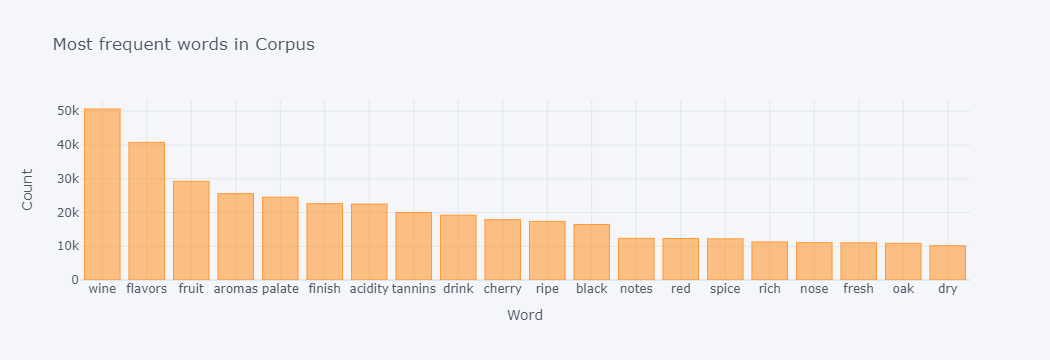

In [873]:
words_df.set_index('word').wordCount.head(20).iplot(kind = 'bar', title = 'Most frequent words in Corpus', yTitle = 'Count', xTitle = 'Word')

In [874]:
print("Total of {} words, {} unique words".format(len(all_words), len(words_df)))

Total of 2080304 words, 37675 unique words


In [875]:
print ("Using words with 5 or more appearnces will reduce the corpus size to: {}".format(sum(words_df.wordCount >= 5)))

Using words with 5 or more appearnces will reduce the corpus size to: 11051


In [876]:
words_df = words_df[words_df.wordCount >= 5]

#### train data- Bag of words 

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [878]:
clean_vocab = set(words_df.word)
count_vect = CountVectorizer(vocabulary = clean_vocab, tokenizer=nltk.word_tokenize)
clean_bow_counts_train = count_vect.fit_transform(train_data.pureTextdescription)
clean_bow_counts_train.shape

(84658, 11051)

##### exemple from the train data

In [879]:
train_data.iloc[1].pureTextdescription

'this wine comes from less than an acre in mâcons smallest appellation  the result is a tight wine with a steely edge  strong citrus and crisp apple flavors are lifted by the nervy acidity and finished with a shot of lemon juice  let this wine calm down and drink from '

In [880]:
print(clean_bow_counts_train[1])

  (0, 65)	1
  (0, 73)	1
  (0, 371)	1
  (0, 378)	1
  (0, 1360)	1
  (0, 1769)	1
  (0, 1962)	1
  (0, 2339)	1
  (0, 2898)	1
  (0, 3015)	1
  (0, 3593)	1
  (0, 3661)	1
  (0, 5060)	1
  (0, 5319)	1
  (0, 5345)	1
  (0, 5350)	1
  (0, 5379)	1
  (0, 6364)	1
  (0, 7965)	1
  (0, 8674)	1
  (0, 8862)	1
  (0, 9213)	1
  (0, 9332)	1
  (0, 9888)	1
  (0, 10849)	3


In [881]:
rev_dict = {v:k for k,v in count_vect.vocabulary_.items()}
print(rev_dict[4958])
print(rev_dict[9218])
print(rev_dict[9636])
print(rev_dict[10920])

inzolia
steer
tame
wooly


#### test data- Bag of words 

In [882]:
test_data['pureTextdescription'] = leave_language_only(test_data.description.str.lower())
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21164 entries, 4 to 119983
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      21156 non-null  object 
 1   description                  21164 non-null  object 
 2   designation                  15096 non-null  object 
 3   points                       21164 non-null  int64  
 4   price                        19635 non-null  float64
 5   province                     21156 non-null  object 
 6   region_1                     17737 non-null  object 
 7   region_2                     8112 non-null   object 
 8   taster_name                  16870 non-null  object 
 9   taster_twitter_handle        16082 non-null  object 
 10  title                        21164 non-null  object 
 11  variety                      21164 non-null  object 
 12  winery                       21164 non-null  object 
 13  normalized poin

In [883]:
test_data[['description','pureTextdescription']].sample(5)

,description,pureTextdescription
84975,Like all good passito dessert wines made from ...,like all good passito dessert wines made from ...
73727,"A smoothly textured, wood-aged wine, richly fl...",a smoothly textured woodaged wine richly fla...
91602,"A medium-sweet wine, with a light prickle on t...",a mediumsweet wine with a light prickle on to...
55271,"It's a ripe wood-aged wine, showing a full bod...",its a ripe woodaged wine showing a full body ...
89982,"Concentrated and spicy, this is full of genero...",concentrated and spicy this is full of genero...


In [884]:
clean_bow_counts_test = count_vect.fit_transform(test_data.pureTextdescription)
clean_bow_counts_test

<21164x11051 sparse matrix of type '<class 'numpy.int64'>'
	with 494934 stored elements in Compressed Sparse Row format>

#### Ridge Regression

In [71]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score

In [72]:
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import mean_squared_error

In [897]:
%%capture
search_grid = np.logspace(-2, 4, num=50, endpoint=True, base=10.0)
MSE_by_alpha = []
for alpha in search_grid:
    model = Ridge(alpha = alpha)
    avg_score = cross_val_score(model, clean_bow_counts_train, y = train_data.points, cv = 10, scoring = 'neg_mean_squared_error').mean()
    MSE_by_alpha.append((alpha,avg_score))

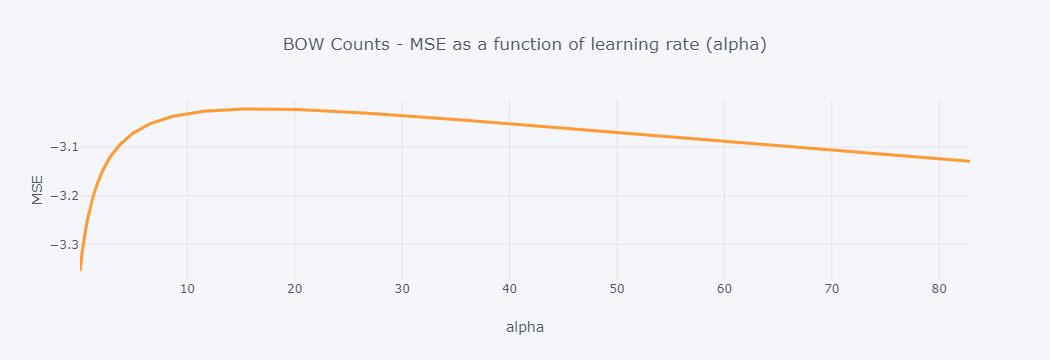

In [898]:
cv_results = pd.DataFrame(MSE_by_alpha, columns = ['alpha', 'MSE'])
cv_results.query('alpha < 100').set_index('alpha').MSE.iplot(title = 'BOW Counts - MSE as a function of learning rate (alpha)', xTitle = 'alpha', yTitle = 'MSE', width = 3, hline=(0,0))

In [899]:
opt_alpha, max_MSE = cv_results.loc[cv_results.MSE.idxmax()]
print(opt_alpha, -max_MSE)

15.264179671752334 3.022034255052909


train the model on the **train set** with the optimal model regularization parameter:

In [900]:
Ridge_model = Ridge(alpha=opt_alpha)
Ridge_model.fit(clean_bow_counts_train, train_data.points)

Ridge(alpha=15.264179671752334)

In [901]:
test_data['predicted_points_Ridge_model'] = Ridge_model.predict(clean_bow_counts_test)

In [905]:
ridge_stats = calc_prediction_quality(test_data, 'predicted_points_Ridge_model','points')
ridge_stats.name = 'ridge_stats'

In [907]:
compared_model_5 = compared_model_4.append(ridge_stats)
compared_model_5

,MSE,MAE,R2
baseline_1,9.322615,2.494265,-0.000002
baseline_2,8.859680,2.430685,0.049655
baseline_3,8.358605,2.349938,0.103404
xgb_stats,6.230297,1.877433,0.331700
ridge_stats,2.960161,1.358504,0.682475


In [908]:
compared_model_5.to_csv('data/all_models_compared.csv', index=False)

### Using both the text and other features

<div class="alert alert-block alert-warning">
<b>TBD</b>
</div>

In [909]:
from scipy.sparse import coo_matrix, hstack

In [963]:
encoded_features[features].sample(5)

,country,province,region_1,region_2,taster_name,variety,winery,years,price
58191,41,51,14,13,19,687,11036,6,35.0
63571,15,47,768,6,16,429,12926,13,112.0
22031,41,51,155,0,7,122,11012,16,13.0
84258,41,265,1202,17,15,429,5315,16,55.0
79045,2,336,291,6,8,60,11817,5,50.0


In [911]:
train_features_spares_matrix = coo_matrix(train_encoded_features[features])
train_united_features = hstack((clean_bow_counts_train ,train_features_spares_matrix))

test_features_spares_matrix = coo_matrix(test_encoded_features[features])
test_united_features = hstack((clean_bow_counts_test ,test_features_spares_matrix))

In [912]:
search_grid = np.logspace(-2, 4, num=50, endpoint=True, base=10.0)
MSE_by_alpha = []
for alpha in search_grid:
    model = Ridge(alpha=alpha)
    avg_score = cross_val_score(model, train_united_features, y = train_data.points, cv = 10, scoring = 'neg_mean_squared_error').mean()
    MSE_by_alpha.append((alpha,avg_score))

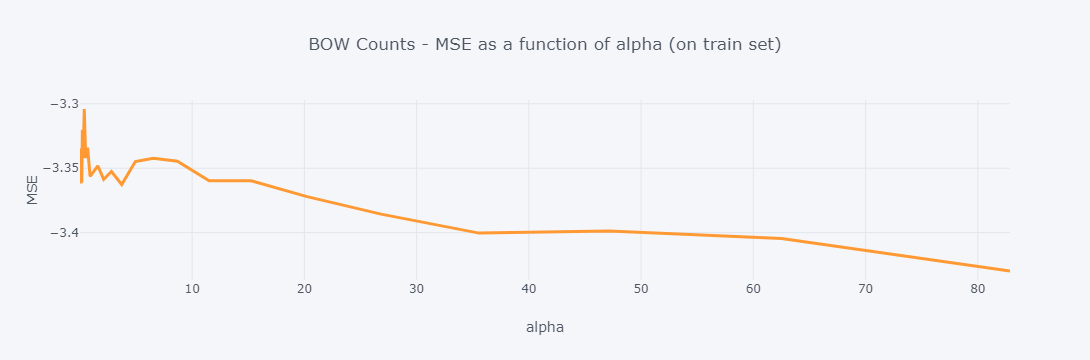

In [913]:
cv_results = pd.DataFrame(MSE_by_alpha, columns = ['alpha', 'MSE'])
cv_results.query('alpha < 100').set_index('alpha').MSE.iplot(title = 'BOW Counts - MSE as a function of alpha (on train set)', xTitle = 'alpha', yTitle = 'MSE', width = 3, hline=(0,0))

In [914]:
opt_alpha, max_MSE = cv_results.loc[cv_results.MSE.idxmax()]
print(opt_alpha, -max_MSE)

0.3906939937054617 3.3040533264029532


train the model on the **train set** with the optimal model regularization parameter:

In [915]:
Ridge_txt_and_ftrs = Ridge(alpha=opt_alpha)
Ridge_txt_and_ftrs.fit(train_united_features, train_data.points)

Ridge(alpha=0.3906939937054617)

In [916]:
test_data['pred_points_Ridge_txt_and_ftrs'] = Ridge_txt_and_ftrs.predict(test_united_features)

In [966]:
Ridge_txt_and_ftrs_stats = calc_prediction_quality(test_data, 'pred_points_Ridge_txt_and_ftrs','points')
Ridge_txt_and_ftrs_stats.name = 'Ridge_txt_and_ftrs'

In [967]:
compared_model_6 = compared_model_5.append(Ridge_txt_and_ftrs_stats)
compared_model_6

,MSE,MAE,R2
baseline_1,9.322615,2.494265,-0.000002
baseline_2,8.859680,2.430685,0.049655
baseline_3,8.358605,2.349938,0.103404
xgb_stats,6.230297,1.877433,0.331700
ridge_stats,2.960161,1.358504,0.682475
Ridge_txt_and_ftrs,3.231039,1.421278,0.653419


alert!!- 
Adding more featers to the text didn't help the accuracy of the results, we would expect it to help, why could this happen?
I will try transforming all the feature values to a common scale

In [983]:
compared_model_6.to_csv('data/all_models_compared.csv', index=False)

### scaling features

In [932]:
from sklearn.preprocessing import MinMaxScaler

In [933]:
scaler = MinMaxScaler()

In [940]:
scaling_train_encoded_features = []
scaling_train_encoded_features = pd.DataFrame(scaler.fit_transform(train_encoded_features[features]), columns=train_encoded_features[features].columns)
scaling_train_encoded_features.sample(5)

,country,province,region_1,region_2,taster_name,variety,winery,years,price
40210,0.953488,0.121429,0.652927,0.058824,0.736842,0.696093,0.620295,0.882353,0.005150
28029,0.186047,0.476190,0.603462,0.352941,0.631579,0.176556,0.819047,0.705882,0.004847
49224,0.953488,0.121429,0.818631,0.588235,0.368421,0.059334,0.763859,0.882353,0.009391
79788,0.953488,0.121429,0.652927,0.058824,0.578947,0.668596,0.660899,0.823529,0.014844
8849,0.395349,0.988095,0.603462,0.352941,0.052632,0.534009,0.481800,0.470588,0.008179


In [945]:
scaling_test_encoded_features = []
scaling_test_encoded_features = pd.DataFrame(scaler.fit_transform(test_encoded_features[features]), columns=test_encoded_features[features].columns)
scaling_test_encoded_features.sample(5)

,country,province,region_1,region_2,taster_name,variety,winery,years,price
1806,0.953488,0.121429,0.037985,0.058824,0.736842,0.622093,0.047469,0.705882,0.016393
413,0.348837,0.026190,0.016515,0.352941,0.842105,0.616279,0.157488,0.764706,0.006797
12666,0.186047,0.004762,0.603633,0.352941,0.631579,0.622093,0.039001,0.411765,0.000000
15250,0.511628,0.883333,0.878613,0.352941,0.736842,0.670058,0.143828,0.411765,0.015594
12451,0.953488,0.121429,0.745665,0.764706,0.736842,0.622093,0.822857,0.705882,0.020392


In [948]:
scaling_train_features_spares_matrix = coo_matrix(scaling_train_encoded_features)
scaling_train_united_features = hstack((clean_bow_counts_train ,scaling_train_features_spares_matrix))

scaling_test_features_spares_matrix = coo_matrix(scaling_test_encoded_features)
scaling_test_united_features = hstack((clean_bow_counts_test ,scaling_test_features_spares_matrix))

In [952]:
search_grid = np.logspace(-2, 4, num=50, endpoint=True, base=10.0)
MSE_by_alpha = []
for alpha in search_grid:
    model = Ridge(alpha=alpha)
    avg_score = cross_val_score(model, scaling_train_united_features, y = train_data.points, cv = 10, scoring = 'neg_mean_squared_error').mean()
    MSE_by_alpha.append((alpha,avg_score))

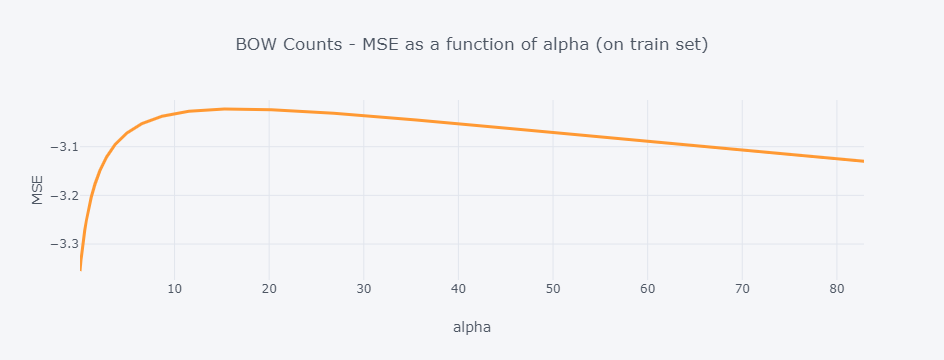

In [954]:
cv_results = pd.DataFrame(MSE_by_alpha, columns = ['alpha', 'MSE'])
cv_results.query('alpha < 100').set_index('alpha').MSE.iplot(title = 'BOW Counts - MSE as a function of alpha (on train set)', xTitle = 'alpha', yTitle = 'MSE', width = 3, hline=(0,0))

In [955]:
opt_alpha, max_MSE = cv_results.loc[cv_results.MSE.idxmax()]
print(opt_alpha, -max_MSE)

15.264179671752334 3.0225285192031413


train the model on the **train set** with the optimal model regularization parameter:

In [956]:
Ridge_ftrs_scaling = Ridge(alpha=opt_alpha)
Ridge_ftrs_scaling.fit(scaling_train_united_features, train_data.points)

Ridge(alpha=15.264179671752334)

In [957]:
test_data['Ridge_ftrs_scaling'] = Ridge_ftrs_scaling.predict(scaling_test_united_features)

In [968]:
Ridge_ftrs_scaling_stats = calc_prediction_quality(test_data, 'Ridge_ftrs_scaling','points')
Ridge_ftrs_scaling_stats.name = 'Ridge_text_and_ftrs_scaling'

In [969]:
compared_model_7 = compared_model_6.append(Ridge_ftrs_scaling_stats)
compared_model_7

,MSE,MAE,R2
baseline_1,9.322615,2.494265,-0.000002
baseline_2,8.859680,2.430685,0.049655
baseline_3,8.358605,2.349938,0.103404
xgb_stats,6.230297,1.877433,0.331700
ridge_stats,2.960161,1.358504,0.682475
Ridge_txt_and_ftrs,3.231039,1.421278,0.653419
Ridge_text_and_ftrs_scaling,2.957613,1.357829,0.682748


yes!- After scaling there is an improvement in MSE!

## Deep Learning approaches

### Fully connected network on the text only

#### Tokenization

In [73]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization, Embedding, Dense, GlobalAveragePooling1D, Dropout
from tensorflow.keras.callbacks import EarlyStopping

What is a good size for the vocabulary? 

In [7]:
wine_reviews.description.apply(lambda x: len(x.split(' '))).quantile([0.95,0.99, 1])

0.95     60.0
0.99     72.0
1.00    135.0
Name: description, dtype: float64

In [8]:
vocab_size = 32000 #  hyperparameter
sequence_length = 60

# Use the text vectorization layer to normalize, split, and map strings to integers. Set maximum_sequence length as all samples are not of the same length.
vectorize_layer = TextVectorization(
    #standardize=lambda text: tf.strings.lower(text), # You can use your own normalization function here
    standardize='lower_and_strip_punctuation', # Or you can use a pre-made normalization function
    max_tokens=vocab_size,    
    split='whitespace',
    output_mode='int',
    name = 'Text_processing',
    output_sequence_length=sequence_length)

In [9]:
vectorize_layer.adapt(train_data['description'])

In [10]:
sample_description = train_data['description'].sample().iloc[0]
print(sample_description)
vectorize_layer(sample_description)

Bright and juicy, this straightforward, savory red delivers aromas and flavors of succulent blackberry, wild cherry, crushed raspberry and hints of cinnamon. Round, soft tannins give it an easy-drinking quality ideal for everyday occasions. Drink soon to capture the fresh fruit.


<tf.Tensor: shape=(60,), dtype=int64, numpy=
array([  62,    2,   71,    7,  439,  146,   34,  176,   17,    2,   11,
          5,  629,   49,  184,   26,  231,   74,    2,  153,    5,  213,
        200,   46,   24,  127,   12,   36,  643,  379, 1404,   31,  772,
       3342,   25,  445,   13, 1938,    3,   40,   16,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0], dtype=int64)>

In [11]:
for token in vectorize_layer(sample_description).numpy()[:20]:
    print(f"{token} ---> ",vectorize_layer.get_vocabulary()[token])

62 --->  bright
2 --->  and
71 --->  juicy
7 --->  this
439 --->  straightforward
146 --->  savory
34 --->  red
176 --->  delivers
17 --->  aromas
2 --->  and
11 --->  flavors
5 --->  of
629 --->  succulent
49 --->  blackberry
184 --->  wild
26 --->  cherry
231 --->  crushed
74 --->  raspberry
2 --->  and
153 --->  hints


#### Modeling

In [12]:
embedding_dim=16

model_dnn = tf.keras.Sequential([
    tf.keras.Input(shape=(1,), dtype=tf.string),
    vectorize_layer,
    Embedding(vocab_size, embedding_dim, name="embedding"),
    GlobalAveragePooling1D(),
    Dense(164, activation='tanh', name='hidden_layer'),
    Dropout(0.2),
    Dense(1, name = 'output_layer')
])

In [83]:
model_dnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Text_processing (TextVector  (None, 60)               0         
 ization)                                                        
                                                                 
 embedding (Embedding)       (None, 60, 16)            512000    
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 hidden_layer (Dense)        (None, 164)               2788      
                                                                 
 dropout_2 (Dropout)         (None, 164)               0         
                                                                 
 output_layer (Dense)        (None, 1)                

In [14]:
tf.keras.utils.plot_model(model_dnn, show_dtype=False, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [15]:
model_dnn.compile(
    optimizer=tf.optimizers.Adam(), loss='mean_absolute_error', metrics=['mean_squared_error','mean_absolute_error'])

In [16]:
%%time
text_col, target_col = 'description', 'points'

early_stopping_monitor = EarlyStopping(
    monitor='val_mean_squared_error',
    min_delta=0,
    patience=2,
    verbose=0,
    restore_best_weights=True
)

history = model_dnn.fit(
    train_data[text_col],
    train_data[target_col],
    epochs=20,
    batch_size=128,
    verbose=1,    
    callbacks=[early_stopping_monitor],
    validation_data = (test_data[text_col], test_data[target_col]))

Epoch 1/20
662/662 [==============================] - 9s 12ms/step - loss: 24.1738 - mean_squared_error: 1523.4551 - mean_absolute_error: 24.1738 - val_loss: 2.4779 - val_mean_squared_error: 9.3292 - val_mean_absolute_error: 2.4779
Epoch 2/20
662/662 [==============================] - 15s 23ms/step - loss: 3.5093 - mean_squared_error: 19.2852 - mean_absolute_error: 3.5093 - val_loss: 1.7841 - val_mean_squared_error: 5.0116 - val_mean_absolute_error: 1.7841
Epoch 3/20
662/662 [==============================] - 21s 31ms/step - loss: 3.1981 - mean_squared_error: 16.0849 - mean_absolute_error: 3.1981 - val_loss: 1.5559 - val_mean_squared_error: 3.8614 - val_mean_absolute_error: 1.5559
Epoch 4/20
662/662 [==============================] - 11s 16ms/step - loss: 3.1163 - mean_squared_error: 15.3136 - mean_absolute_error: 3.1163 - val_loss: 1.4567 - val_mean_squared_error: 3.3944 - val_mean_absolute_error: 1.4567
Epoch 5/20
662/662 [==============================] - 9s 13ms/step - loss: 3.0783

### Simple NN Prediction & Evaluation

In [17]:
test_data['dnn_stat'] = model_dnn.predict(test_data[text_col])

In [18]:
dnn_stat = calc_prediction_quality(test_data, 'dnn_stat', target_col)

In [19]:
dnn_stat.name = 'dnn_stat'
dnn_stat

MSE    2.963829
MAE    1.357136
R2     0.682081
Name: dnn_stat, dtype: float64

In [24]:
compared_model_8 = compared_model_7.append(dnn_stat)
compared_model_8

,MSE,MAE,R2
baseline_1,9.322615,2.494265,-0.000002
baseline_2,8.859680,2.430685,0.049655
baseline_3,8.358605,2.349938,0.103404
xgb_stats,6.230297,1.877433,0.331700
ridge_stats,2.960161,1.358504,0.682475
Ridge_txt_and_ftrs,3.231039,1.421278,0.653419
Ridge_text_and_ftrs_scaling,2.957613,1.357829,0.682748
dnn_stat,2.963829,1.357136,0.682081


### Descriptions words concatinated

In [39]:
import tensorflow as tf
from tensorflow.keras.layers import Reshape, Dense, Dropout, Embedding
from tensorflow.keras import Sequential
from tensorflow.keras.utils import  plot_model

In [47]:
embedding_dim=16

model_concatinated = tf.keras.Sequential([
    tf.keras.Input(shape=(1,), dtype=tf.string),
    vectorize_layer,
    Embedding(vocab_size, embedding_dim, name="embedding", ),
    Reshape((embedding_dim * sequence_length, ), name='concat_words'),
    Dense(700, activation='tanh', name='hidden_layer'),
    Dropout(0.7),
    Dense(1, name = 'output_layer')
])

In [48]:
model_concatinated.compile(
    optimizer=tf.optimizers.Adam(), loss='mean_absolute_error', metrics=['mean_squared_error','mean_absolute_error'])

In [49]:
tf.keras.utils.plot_model(model_concatinated, show_dtype=True, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [50]:
%%time
text_col, target_col = 'description', 'points'

early_stopping_monitor = EarlyStopping(
    monitor='val_mean_squared_error',
    min_delta=0,
    patience=2,
    verbose=0,
    restore_best_weights=True
)

history = model_concatinated.fit(
    train_data[text_col],
    train_data[target_col],
    epochs=20,
    batch_size=256,
    verbose=1,    
    callbacks=[early_stopping_monitor],
    validation_data = (test_data[text_col], test_data[target_col]))

Epoch 1/20
331/331 [==============================] - 11s 31ms/step - loss: 13.1130 - mean_squared_error: 628.1619 - mean_absolute_error: 13.1130 - val_loss: 2.5034 - val_mean_squared_error: 9.5097 - val_mean_absolute_error: 2.5034
Epoch 2/20
331/331 [==============================] - 11s 32ms/step - loss: 4.8083 - mean_squared_error: 36.1480 - mean_absolute_error: 4.8083 - val_loss: 2.4925 - val_mean_squared_error: 9.2679 - val_mean_absolute_error: 2.4925
Epoch 3/20
331/331 [==============================] - 10s 29ms/step - loss: 4.7014 - mean_squared_error: 34.7403 - mean_absolute_error: 4.7014 - val_loss: 1.8346 - val_mean_squared_error: 5.2796 - val_mean_absolute_error: 1.8346
Epoch 4/20
331/331 [==============================] - 10s 29ms/step - loss: 4.3865 - mean_squared_error: 30.1959 - mean_absolute_error: 4.3865 - val_loss: 1.5076 - val_mean_squared_error: 3.6410 - val_mean_absolute_error: 1.5076
Epoch 5/20
331/331 [==============================] - 10s 29ms/step - loss: 4.347

In [51]:
test_data['dnn_concatinated'] = model_concatinated.predict(test_data[text_col])

In [52]:
dnn_concatinated = calc_prediction_quality(test_data, 'dnn_concatinated', target_col)
dnn_concatinated

MSE    3.235679
MAE    1.418518
R2     0.652921
dtype: float64

In [53]:
dnn_concatinated.name = 'dnn_concatinated'

In [54]:
compared_model_9 = compared_model_8.append(dnn_concatinated)
compared_model_9

,MSE,MAE,R2
baseline_1,9.322615,2.494265,-0.000002
baseline_2,8.859680,2.430685,0.049655
baseline_3,8.358605,2.349938,0.103404
xgb_stats,6.230297,1.877433,0.331700
ridge_stats,2.960161,1.358504,0.682475
Ridge_txt_and_ftrs,3.231039,1.421278,0.653419
Ridge_text_and_ftrs_scaling,2.957613,1.357829,0.682748
dnn_stat,2.963829,1.357136,0.682081
dnn_concatinated,3.235679,1.418518,0.652921


### Using external embedding (description feature only)

Follow https://keras.io/examples/nlp/pretrained_word_embeddings/

You can either average the description words embeddings, concatinate them or do both and compare. 

In [100]:
import os
import urllib.request
import matplotlib.pyplot as plt
from scipy import spatial
from sklearn.manifold import TSNE
import numpy as np

In [101]:
filename = "glove.6B.50d.txt"
path_to_glove_file = os.getcwd() + "\\" + filename

embeddings_index = {}     
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

f.close()

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [102]:
embedding_matrix = np.zeros((vocab_size, 50))

In [103]:
not_in_glove = []
i = 0
for word in vectorize_layer.get_vocabulary():
    if embeddings_index.get(word) is not None:
        embedding_matrix[i] = embeddings_index.get(word)
    else:
        not_in_glove.append((i, vectorize_layer.get_vocabulary()[i]))   
    i =+ 1 

In [177]:
(len(not_in_glove)/len(embedding_matrix))*100

39.49375

39% of the words are not in the glov!
we can cleaing the text and explror the glove more to find a better fit, (not in this work).

In [119]:
#embedding_dim=16

model_external_embedding = tf.keras.Sequential([
    tf.keras.Input(shape=(1,), dtype=tf.string),
    vectorize_layer,
    Embedding(input_dim=vocab_size,
              output_dim=50,
              weights=[embedding_matrix],
              input_length=sequence_length,
              trainable=False),
    GlobalAveragePooling1D(),
    Dense(500, activation='tanh', name='hidden_layer'),
    Dropout(0.2),
    Dense(1, name = 'output_layer')
])

In [120]:
model_external_embedding.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Text_processing (TextVector  (None, 60)               0         
 ization)                                                        
                                                                 
 embedding_2 (Embedding)     (None, 60, 50)            1600000   
                                                                 
 global_average_pooling1d_5   (None, 50)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 hidden_layer (Dense)        (None, 500)               25500     
                                                                 
 dropout_9 (Dropout)         (None, 500)               0         
                                                                 
 output_layer (Dense)        (None, 1)                

In [121]:
model_external_embedding.compile(
    optimizer=tf.optimizers.Adam(), loss='mean_absolute_error', metrics=['mean_squared_error','mean_absolute_error'])

In [122]:
%%time
text_col, target_col = 'description', 'points'

early_stopping_monitor = EarlyStopping(
    monitor='val_mean_squared_error',
    min_delta=0,
    patience=2,
    verbose=0,
    restore_best_weights=True
)

history = model_external_embedding.fit(
    train_data[text_col],
    train_data[target_col],
    epochs=20,
    batch_size=256,
    verbose=1,    
    callbacks=[early_stopping_monitor],
    validation_data = (test_data[text_col], test_data[target_col]))

Epoch 1/20
331/331 [==============================] - 4s 12ms/step - loss: 49.6418 - mean_squared_error: 3468.1680 - mean_absolute_error: 49.6418 - val_loss: 5.5489 - val_mean_squared_error: 86.7836 - val_mean_absolute_error: 5.5489
Epoch 2/20
331/331 [==============================] - 5s 14ms/step - loss: 3.1341 - mean_squared_error: 16.4419 - mean_absolute_error: 3.1341 - val_loss: 2.4535 - val_mean_squared_error: 9.2757 - val_mean_absolute_error: 2.4535
Epoch 3/20
331/331 [==============================] - 4s 13ms/step - loss: 2.9480 - mean_squared_error: 13.4210 - mean_absolute_error: 2.9480 - val_loss: 2.4596 - val_mean_squared_error: 9.2345 - val_mean_absolute_error: 2.4596
Epoch 4/20
331/331 [==============================] - 4s 12ms/step - loss: 2.9396 - mean_squared_error: 13.3245 - mean_absolute_error: 2.9396 - val_loss: 2.4998 - val_mean_squared_error: 9.3579 - val_mean_absolute_error: 2.4998
Epoch 5/20
331/331 [==============================] - 4s 13ms/step - loss: 2.9492 -

In [123]:
test_data['dnn__external_embedding'] = model_external_embedding.predict(test_data[text_col])

In [124]:
dnn_external_embedding = calc_prediction_quality(test_data, 'dnn__external_embedding', target_col)
dnn_external_embedding

MSE    9.227414
MAE    2.472947
R2     0.010210
dtype: float64

In [125]:
dnn_external_embedding.name = 'dnn_external_embedding'

In [112]:
compared_model_10 = compared_model_9.append(dnn_external_embedding)
compared_model_10

,MSE,MAE,R2
baseline_1,9.322615,2.494265,-0.000002
baseline_2,8.859680,2.430685,0.049655
baseline_3,8.358605,2.349938,0.103404
xgb_stats,6.230297,1.877433,0.331700
ridge_stats,2.960161,1.358504,0.682475
Ridge_txt_and_ftrs,3.231039,1.421278,0.653419
Ridge_text_and_ftrs_scaling,2.957613,1.357829,0.682748
dnn_stat,2.963829,1.357136,0.682081
dnn_concatinated,3.235679,1.418518,0.652921
dnn_external_embedding,9.242284,2.482059,0.008615


I think there is a mistake in the code logic of the model  because the ratio of MSE,MAE is very high compared to other results I have seen so far. (?)
Regardless, it can be expected that the results will be less accurateit , there are not many similar words in the external dictionary in relation to all the words in the wine data set , so you can expect results to be less accurate

<div class="alert alert-block alert-warning">
<b>TBD</b>
</div>

### Using LSTM or RNN Layer, (description feature only)

See example here: https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM

In [142]:
from keras.layers import LSTM

In [156]:
model_lstm = tf.keras.Sequential([
    tf.keras.Input(shape=(1,), dtype=tf.string),
    vectorize_layer,
    Embedding(vocab_size, embedding_dim, name="embedding", ),
    tf.keras.layers.LSTM(
                        128,
                        activation='tanh',
                        recurrent_activation='sigmoid',
                        use_bias=True,
                        kernel_initializer='glorot_uniform',
                        recurrent_initializer='orthogonal',
                        bias_initializer='zeros',
                        unit_forget_bias=True,
                        kernel_regularizer=None,
                        recurrent_regularizer=None,
                        bias_regularizer=None,
                        activity_regularizer=None,
                        kernel_constraint=None,
                        recurrent_constraint=None,
                        bias_constraint=None,
                        dropout=0.0,
                        recurrent_dropout=0.0,
                        return_sequences=False,
                        return_state=False,
                        go_backwards=False,
                        stateful=False,
                        time_major=False,
                        unroll=False,
                        ),
    Dense(128, activation='tanh', name='hidden_layer'),
    Dense(1, name = 'output_layer')
])

In [157]:
model_lstm.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Text_processing (TextVector  (None, 60)               0         
 ization)                                                        
                                                                 
 embedding (Embedding)       (None, 60, 16)            512000    
                                                                 
 lstm_1 (LSTM)               (None, 128)               74240     
                                                                 
 hidden_layer (Dense)        (None, 128)               16512     
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 602,881
Trainable params: 602,881
Non-trainable params: 0
_______________________________________________

In [158]:
model_lstm.compile(
    optimizer=tf.optimizers.Adam(), loss='mean_absolute_error', metrics=['mean_squared_error','mean_absolute_error'])

In [159]:
%%time
text_col, target_col = 'description', 'points'

early_stopping_monitor = EarlyStopping(
    monitor='val_mean_squared_error',
    min_delta=0,
    patience=2,
    verbose=0,
    restore_best_weights=True
)

history = model_lstm.fit(
    train_data[text_col],
    train_data[target_col],
    epochs=20,
    batch_size=128,
    verbose=1,    
    callbacks=[early_stopping_monitor],
    validation_data = (test_data[text_col], test_data[target_col]))

Epoch 1/20
662/662 [==============================] - 79s 117ms/step - loss: 32.0013 - mean_squared_error: 1604.8330 - mean_absolute_error: 32.0013 - val_loss: 2.4677 - val_mean_squared_error: 9.4958 - val_mean_absolute_error: 2.4677
Epoch 2/20
662/662 [==============================] - 81s 122ms/step - loss: 2.4995 - mean_squared_error: 9.6686 - mean_absolute_error: 2.4995 - val_loss: 2.4674 - val_mean_squared_error: 9.4995 - val_mean_absolute_error: 2.4674
Epoch 3/20
662/662 [==============================] - 83s 126ms/step - loss: 2.4997 - mean_squared_error: 9.6602 - mean_absolute_error: 2.4997 - val_loss: 2.4698 - val_mean_squared_error: 9.4702 - val_mean_absolute_error: 2.4698
Epoch 4/20
662/662 [==============================] - 84s 127ms/step - loss: 2.5010 - mean_squared_error: 9.6558 - mean_absolute_error: 2.5010 - val_loss: 2.4678 - val_mean_squared_error: 9.5159 - val_mean_absolute_error: 2.4678
Epoch 5/20
662/662 [==============================] - 85s 128ms/step - loss: 2.

In [166]:
test_data['dnn_lstm'] = model_lstm.predict(test_data[text_col])

In [167]:
dnn_lstm = calc_prediction_quality(test_data, 'dnn__lstm', target_col)
dnn_lstm

MSE    9.457553
MAE    2.470858
R2    -0.014476
dtype: float64

In [168]:
dnn_lstm.name = 'dnn_lstm'

In [170]:
compared_model_11 = compared_model_10.append(dnn_lstm)
compared_model_11

,MSE,MAE,R2
baseline_1,9.322615,2.494265,-0.000002
baseline_2,8.859680,2.430685,0.049655
baseline_3,8.358605,2.349938,0.103404
xgb_stats,6.230297,1.877433,0.331700
ridge_stats,2.960161,1.358504,0.682475
Ridge_txt_and_ftrs,3.231039,1.421278,0.653419
Ridge_text_and_ftrs_scaling,2.957613,1.357829,0.682748
dnn_stat,2.963829,1.357136,0.682081
dnn_concatinated,3.235679,1.418518,0.652921
dnn_external_embedding,9.242284,2.482059,0.008615


In [171]:
compared_model_11.to_csv('data/all_models_compared_08.06.22.csv', index=False)
compared_model_11.to_pickle('data/all_models_compared_08.06.22.pkl')

In [172]:
wine_reviews = pd.read_pickle('data/data_wine_reviews_04.06.22.pkl')
train_data = pd.read_pickle('data/train_data_wine_04.06.22.pkl')
test_data = pd.read_pickle('data/test_data_wine_04.06.22.pkl')
compared_model_11 = pd.read_pickle('data/all_models_compared_08.06.22.pkl')

I think there is a mistake in the code logic of the model  because the ratio of MSE,MAE is very high compared to other results I have seen so far. (?)
Regardless,The use of the LSTM leyer is not good in our case, the capcity of the model is not necessary for the dataset of the wine because the text is not very long and the amount of data is relatively small

<div class="alert alert-block alert-warning">
<b>TBD</b>
</div>

### Bonus (Not mandatory) Use all features using Keras functional API

See here: https://keras.io/guides/functional_api/

<div class="alert alert-block alert-warning">
<b>TBD</b>
</div>